In [8]:
import torch

In [9]:
data = torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/epoch_100.pth")


In [10]:
data['train']['ExactMatchAccuracy']

[0.5789017466302605,
 0.5895780060388044,
 0.59483667779078,
 0.6057151938051691,
 0.6319218711625421,
 0.6764327713489071,
 0.7451133359337754,
 0.814949652552045,
 0.8678253080801515,
 0.8976292636414858,
 0.9089411866684003,
 0.9202964503965674,
 0.9300481081783903,
 0.932475187448533,
 0.9347433508140829,
 0.9428625088487265,
 0.9407821551886043,
 0.9452462474176165,
 0.9464453401522703,
 0.9502448749620769,
 0.951732905705081,
 0.9549401175977694,
 0.9525419321284618,
 0.9541888787760586,
 0.9591586125196839,
 0.9565437235441137,
 0.9606033025614354,
 0.9618890766985944,
 0.9613400944827287,
 0.9627992314248978,
 0.9641861338649793,
 0.9618601828977593,
 0.9658475274129935,
 0.9657319522096535,
 0.9649518195871076,
 0.9671621953509875,
 0.9687658012973317,
 0.966757682139297,
 0.9687224605960791,
 0.9716985220820873,
 0.9701671506378307,
 0.9651829699937878,
 0.9729842962192462,
 0.9701960444386657,
 0.9731865528250914,
 0.9729265086175761,
 0.9712506681691443,
 0.9744000924601627

In [11]:
train_loss = []
val_loss = []

In [12]:
for i in data['train']["loss"]:
    val = i.cpu().item()
    train_loss.append(val)

In [13]:
for i in data['val']["loss"]:
    val = i.cpu().item()
    # print(val)
    val_loss.append(val)

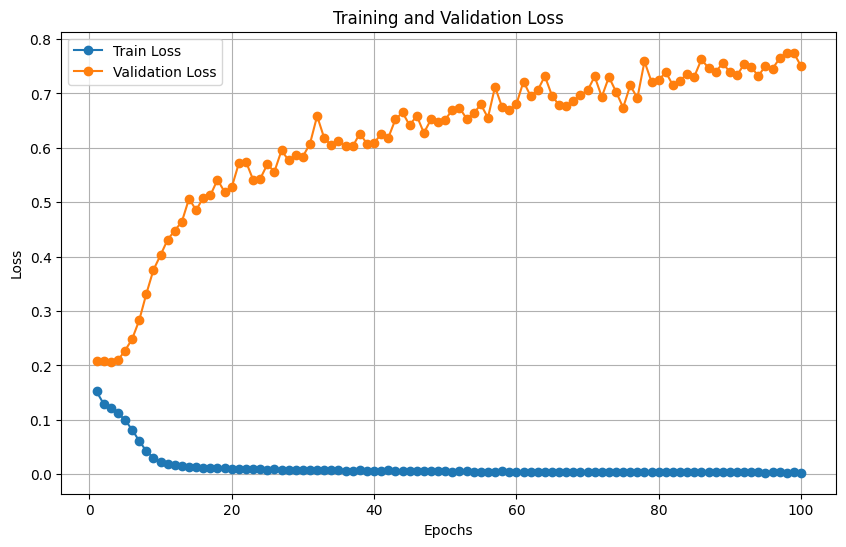

In [14]:
import matplotlib.pyplot as plt

# Example data
epochs = list(range(1, 101))
# train_loss = data['train']["loss"]
# val_loss = data['val']["loss"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
import plotly.graph_objects as go

# Create the interactive plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Training and Validation Loss',
    xaxis_title='Epochs',
    yaxis_title='Loss',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    legend=dict(x=0, y=1),
    grid=dict(),
)

fig.show()


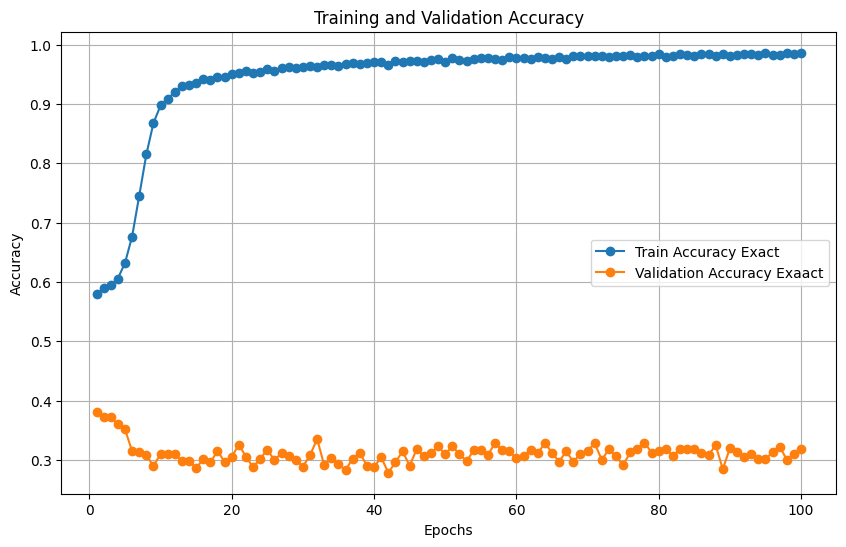

In [16]:
import matplotlib.pyplot as plt

# Example data
epochs = list(range(1, 101))
# train_loss = data['train']["loss"]
# val_loss = data['val']["loss"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, data['train']['ExactMatchAccuracy'], label='Train Accuracy Exact', marker='o')
plt.plot(epochs, data['val']['ExactMatchAccuracy'], label='Validation Accuracy Exaact', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
import plotly.graph_objects as go

# Create the interactive plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=epochs, y=data['train']['ExactMatchAccuracy'], mode='lines+markers', name='Train Accuracy'))
fig.add_trace(go.Scatter(x=epochs, y=data['val']['ExactMatchAccuracy'], mode='lines+markers', name='Validation Accuracy'))

fig.update_layout(
    title='Training and Validation Accuracy',
    xaxis_title='Epochs',
    yaxis_title='Accuracy',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    legend=dict(x=0, y=1),
    grid=dict(),
)

fig.show()

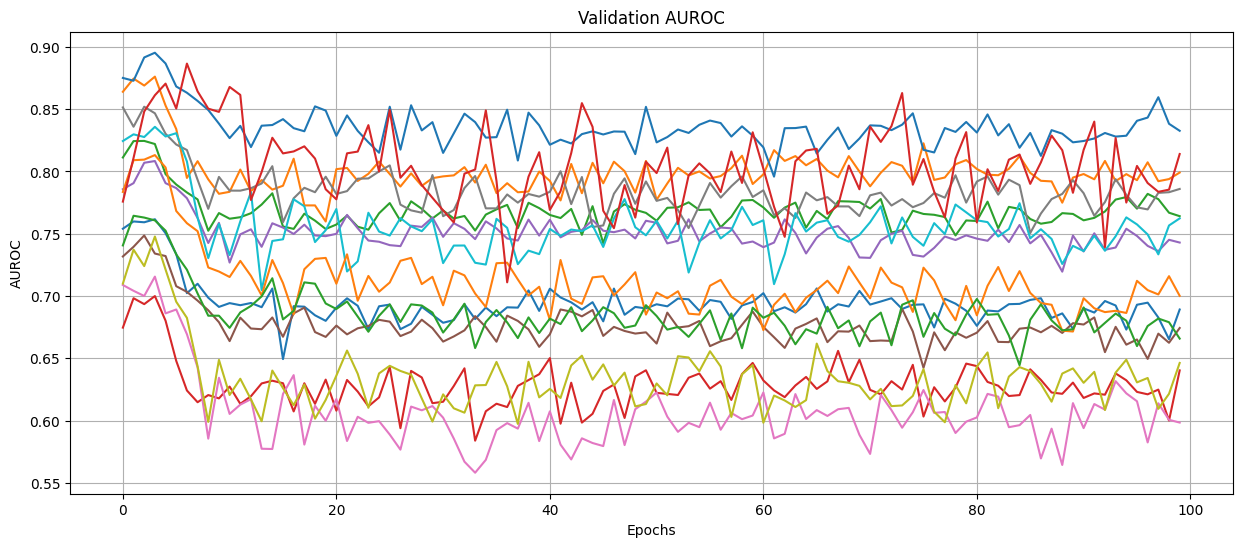

In [18]:
plt.figure(figsize=(15, 6))
plt.plot(data['val']['MultiLabelAUROC'])
plt.xlabel('Epochs')
plt.ylabel('AUROC')
plt.title('Validation AUROC')
# plt.legend()
plt.grid(True)
plt.show()

In [19]:
avg_auroc = []
for epoch, score_list in enumerate(data['val']['MultiLabelAUROC']):
    avg_auroc.append(sum(score_list)/14)

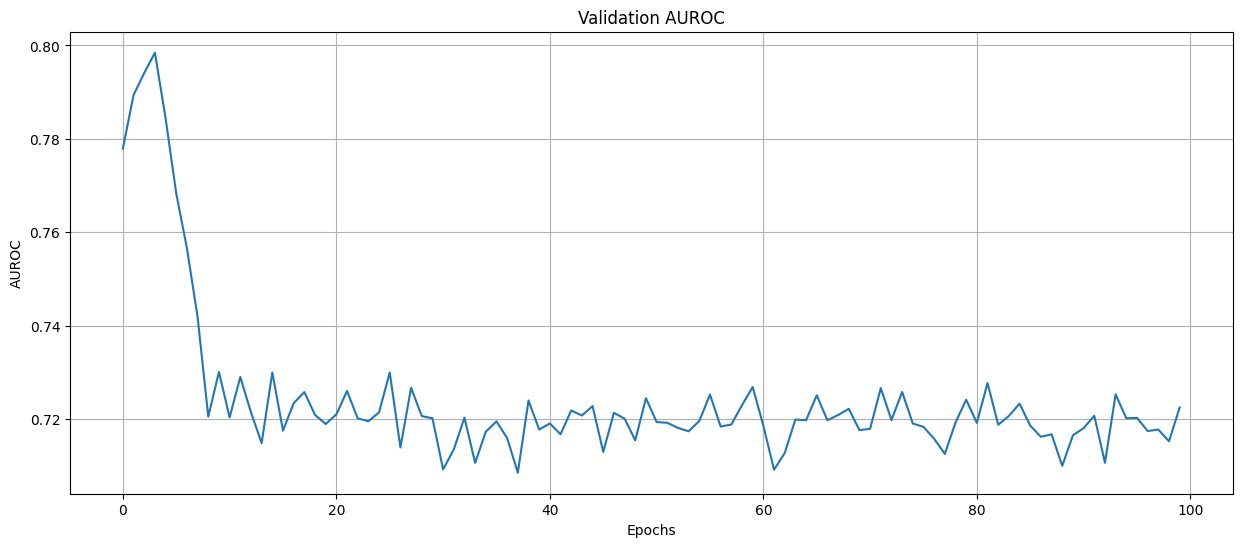

In [20]:
plt.figure(figsize=(15, 6))
plt.plot(avg_auroc)
plt.xlabel('Epochs')
plt.ylabel('AUROC')
plt.title('Validation AUROC')
# plt.legend()
plt.grid(True)
plt.show()